In [1]:
import pandas as pd

df_data = pd.read_excel("../data_to_work_dm_12042022/Elisa-Nexzy-Jorge-Base de datos 13.10.2017 - IgAS.xlsx", skiprows=1)
df_data

,ID MUESTRA,NOMBRE,APELLIDO PATERNO,APELLIDO MATERNO,OD1 450 NM,OD2 450 NM,PROMEDIO OD 450 NM,B/BO MEDIDO 450 NM,CONCENTRACIÓN 450 NM,OD1 492 NM,OD2 492 NM,PROMEDIO OD 492 NM,B/BO MEDIDO A 492 NM,CONCENTRACIÓN 492 NM,OBSERVACION 1,OBSERVACION 2
0,001-1,Maximiliano,Cárdenas,Catelicán,1.3455,1.3136,1.32955,0.906645,4.164252,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN
1,001-2,Maximiliano,Cárdenas,Catelicán,1.2427,1.2243,1.23350,0.841147,9.944393,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN
2,001-3,Maximiliano,Cárdenas,Catelicán,1.3298,1.2640,1.29690,0.884381,6.055710,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN
3,001-4,Maximiliano,Cárdenas,Catelicán,1.2850,1.2817,1.28335,0.875141,6.861995,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN
4,004-1,Martín,Pérez,González,1.2616,1.2491,1.25535,0.856047,8.570093,NaN,NaN,NaN,NaN,NaN,OD MEDIDA SOLO A 450 NM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,062-4,Amaia,Varas,Vito,1.5817,1.4189,1.50030,0.779114,0.779114,0.2808,0.2563,0.26855,0.803441,0.803441,NaN,NaN
107,066-1,Evolet,Cardozo,Legüe,1.0412,1.4846,1.26290,0.655830,0.655830,0.1968,0.2656,0.23120,0.691698,0.691698,NaN,NaN
108,066-2,Evolet,Cardozo,Legüe,1.4151,1.5266,1.47085,0.763820,0.763820,0.2551,0.2733,0.26420,0.790426,0.790426,NaN,NaN
109,066-3,Evolet,Cardozo,Legüe,1.0498,1.2598,1.15480,0.599694,0.599694,0.1987,0.2319,0.21530,0.644129,0.644129,NaN,NaN


In [2]:
matrix_data = []

for column in df_data.columns:
    count_null = df_data[column].isna().sum()
    percentage = count_null/len(df_data)*100
    row = [column, count_null, percentage]
    matrix_data.append(row)

df_summary = pd.DataFrame(matrix_data, columns=['columna', 'count', 'percentage'])
df_summary = df_summary.sort_values(by=['percentage'], ascending=False)
df_summary

,columna,count,percentage
15,OBSERVACION 2,108,97.297297
14,OBSERVACION 1,75,67.567568
9,OD1 492 NM,36,32.432432
10,OD2 492 NM,36,32.432432
11,PROMEDIO OD 492 NM,36,32.432432
12,B/BO MEDIDO A 492 NM,36,32.432432
13,CONCENTRACIÓN 492 NM,36,32.432432
8,CONCENTRACIÓN 450 NM,4,3.603604
0,ID MUESTRA,0,0.000000
1,NOMBRE,0,0.000000


In [3]:
df_data.columns

Index(['ID MUESTRA', 'NOMBRE ', 'APELLIDO PATERNO', 'APELLIDO MATERNO',
       'OD1 450 NM', 'OD2 450 NM', 'PROMEDIO OD 450 NM', 'B/BO MEDIDO 450 NM',
       'CONCENTRACIÓN 450 NM', 'OD1 492 NM', 'OD2 492 NM ',
       'PROMEDIO OD 492 NM', 'B/BO MEDIDO A 492 NM ', 'CONCENTRACIÓN 492 NM ',
       'OBSERVACION 1', 'OBSERVACION 2'],
      dtype='object')

In [4]:
columns_to_plot = ['OD1 450 NM', 'OD2 450 NM', 'PROMEDIO OD 450 NM', 'B/BO MEDIDO 450 NM',
       'CONCENTRACIÓN 450 NM', 'OD1 492 NM', 'OD2 492 NM ',
       'PROMEDIO OD 492 NM', 'B/BO MEDIDO A 492 NM ', 'CONCENTRACIÓN 492 NM ']

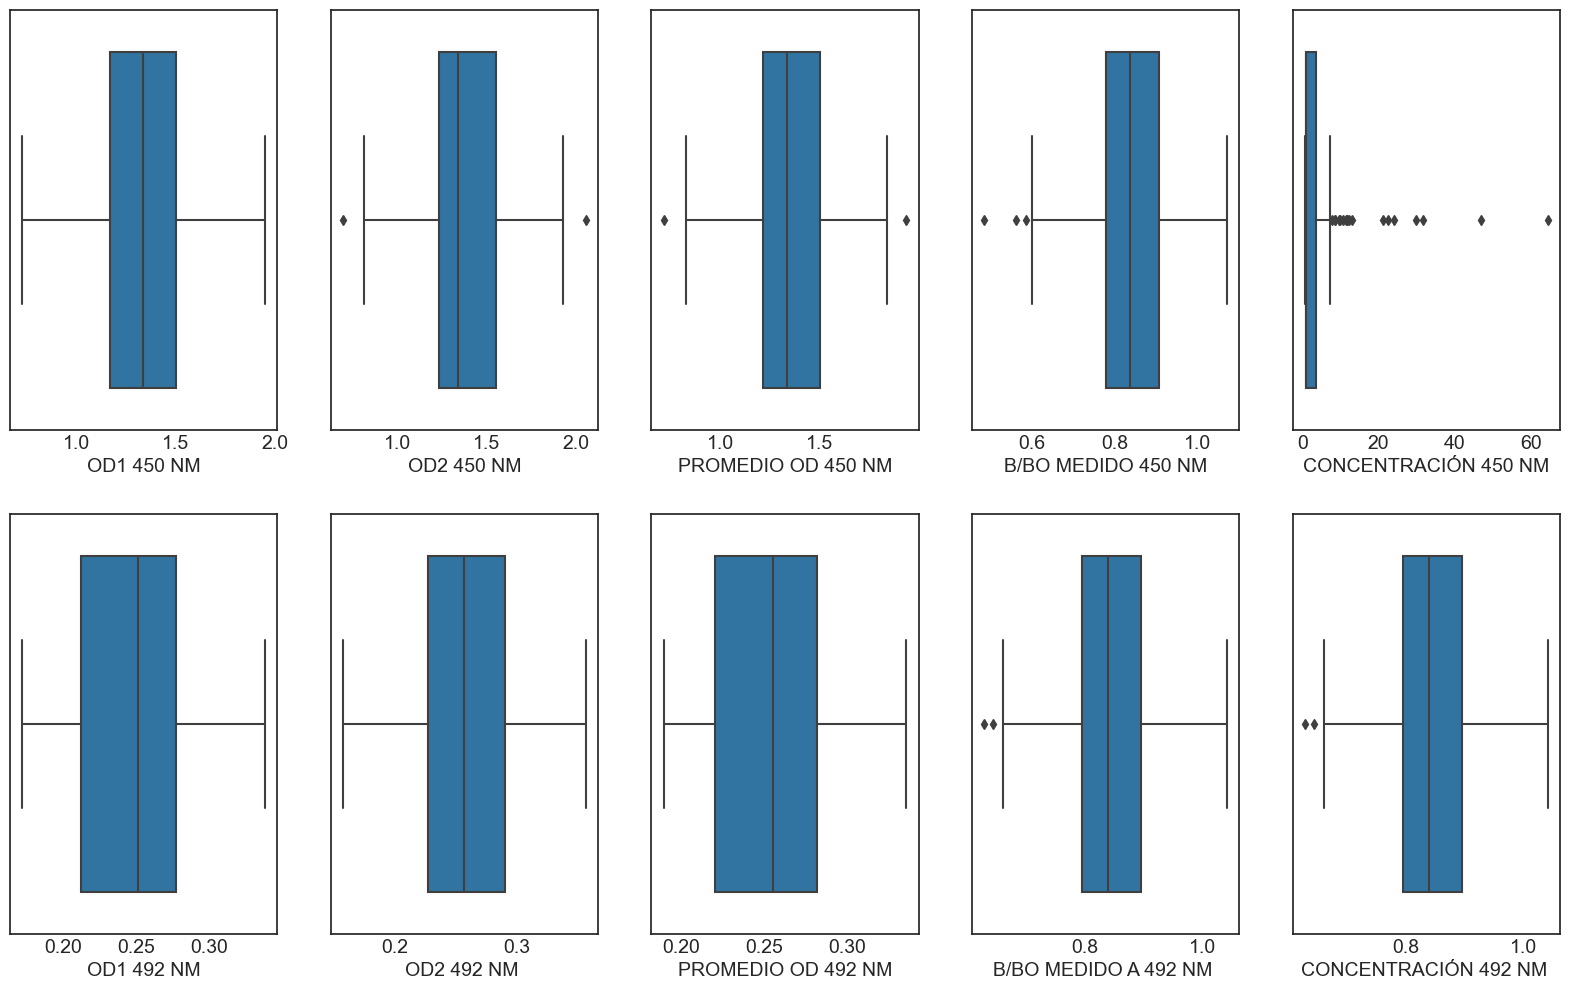

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(2, 5, figsize=(20, 12))

i = 0
j = 0
index =0

for column in columns_to_plot:
    index+=1
    sns.boxplot(ax=axes[i][j], x=df_data[column])

    if index == 5 or index==10:
        i += 1
        j = 0
    else:
        j+=1